In [13]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [14]:
label_encoder = LabelEncoder()

In [15]:
df = pd.read_csv('housing.csv')

In [4]:
print(df.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [16]:
df.dropna(inplace=True)

In [17]:
df['ocean_proximity'] = label_encoder.fit_transform(df['ocean_proximity'])

In [18]:
X = df['median_income'].values.reshape(-1, 1)
y = df['median_house_value'].values

In [8]:
model = LinearRegression()

In [10]:
parameters = {
    'fit_intercept': [True, False],
    
    
}

In [11]:
grid_search = GridSearchCV(model, parameters, cv=5, scoring='r2')
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False]},
             scoring='r2')

In [12]:
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

In [13]:
print(best_parameters)
print(best_score)

{'copy_X': True, 'fit_intercept': True, 'positive': False}
-0.07666991230196625


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, predictions)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2 score):", r_squared)

Mean Absolute Error (MAE): 63374.551304332555
Mean Squared Error (MSE): 7221011204.235034
Root Mean Squared Error (RMSE): 84976.53325615863
R-squared (R2 score): 0.4719622857489497


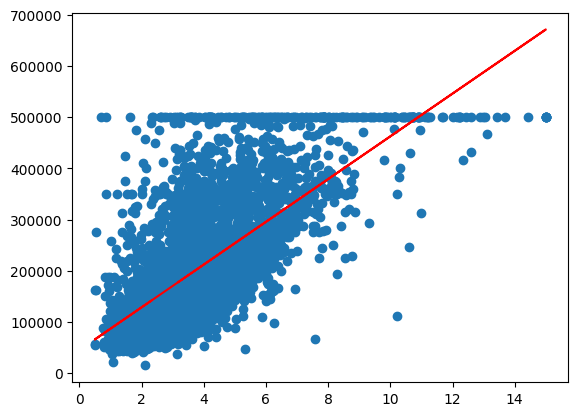

In [12]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test)
plt.plot(X_test, predictions, color='red')